_MACHINE LEARNING ASSIGNMENT 4 REPORT__

__Prepared by Paul Atilola__
 
 The following are the steps taken through data processing and building a machine learning model.
 * convert raw data file to .csv file to give a proepr header 
 * Import the breast cancer data (.csv) using Panda library
 * Poll for null data points
 * Split datasets into test and training sets using sklearn's model_selection class
 * Build the logistic Regression alorithm using Ralph Newton's method
 * Run the training sets on the designed ML algorithm to train the model: This estimates W - hyperparamters
 * Run the test sets on the model to estimate predition accuracy.
 * Repeat the previous two steps for 10 random sets. 
 * compute rthe average esstimation.
 * Run the training and testing steps on sklearn's logistic regression model and compare acuracy
 

In [1]:
import numpy as np # linear algebra
from numpy import median
from numpy import mean
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [24]:
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitosis","Diagnostics"]
data = pd.read_csv("breast-cancer-wisconsin.data", na_values = '?', index_col=['ID'], names = headers)

median_val6 = int(data['BN'].mean())
data['BN'].fillna(median_val6, inplace=True)
data.astype({'BN': 'int64'}).dtypes

data = data.reset_index(drop=True)
data = data.fillna(0)

le = LabelEncoder()
data["Diagnostics"] = le.fit_transform(data["Diagnostics"])
data["Diagnostics"].unique()
data

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitosis,Diagnostics
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


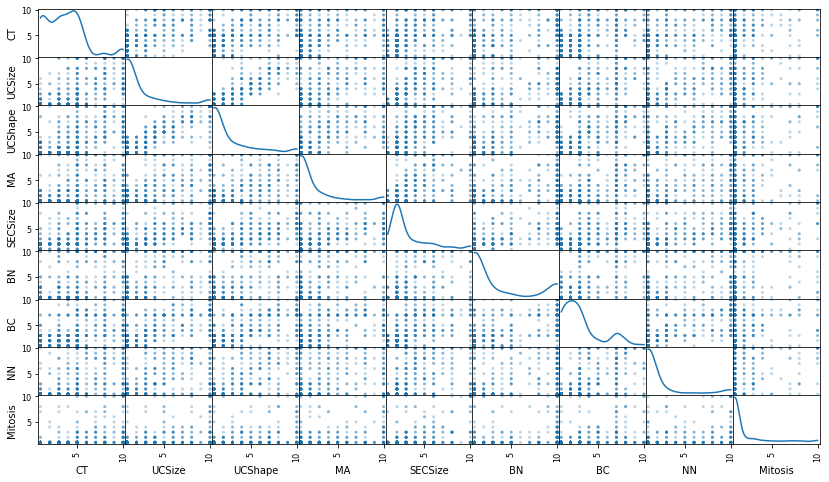

In [25]:
X = data.drop(["Diagnostics"], axis=1)
y = data["Diagnostics"].values.reshape(-1,1)

pd.plotting.scatter_matrix(X, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,)

In [26]:
# regression function
def f(beta):
  return np.ravel(np.ones(len(y_train))*(np.log(1+np.exp(X_train*beta)))-y_train.T*X_train*beta)[0]

# gradient function 
def nabla_f(beta):
  return X_train.T*(1/(1+1/np.exp(X_train*beta))-y_train)

# Hessian matrix function
def nabla2_f(beta):
  return X_train.T.dot((np.diag(np.ravel(np.exp(X_train.dot(beta))/np.power(1+np.exp(X_train.dot(beta)),2))).dot(X_train)))

In [27]:
# implementing the newton method

import warnings 
warnings.filterwarnings("ignore")


beta = np.matrix(np.zeros(X_train.shape[1])).T
TOL = np.power(10.,-10)
counter = 0
while np.linalg.norm(nabla_f(beta)) > TOL:
  counter += 1
  beta -= np.dot(np.linalg.inv(nabla2_f(beta)), nabla_f(beta))
  
print('iter =',counter)
print(beta)
print('norm =',np.linalg.norm(nabla_f(beta)))

iter = 8
[[-3.17888469]
 [ 7.75961717]
 [ 2.67038482]
 [ 1.87990069]
 [-7.82418729]
 [ 5.59959264]
 [-4.79732511]
 [ 3.74137893]
 [ 2.63895281]]
norm = 4.459123819496994e-15


In [31]:
#prediction functin for our classsification 

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def predict_func(beta,X_test):
    sig = sigmoid(np.dot(beta.T,X_test.T))
    Y_prediction = np.zeros((1,X_test.shape[0]))
    # our sig resutl predicts either benign or malignant
    for i in range(sig.shape[1]):
        if sig[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    Y_prediction = Y_prediction.T
    return Y_prediction

In [37]:
y_pred = predict_func(beta,X_test)
print('y_test.shape',y_test.shape)
print('y_pred.shape',y_pred.shape)
acc_score = accuracy_score(y_test, y_pred)
print("Test accuracy : {:.5f}%".format(acc_score*100))

y_test.shape (140, 1)
y_pred.shape (140, 1)
Test accuracy : 89.28571%


In [39]:
# testing our accuracy score against established sklearn logostics regression model

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',C=1e9,fit_intercept=False).fit(X_train,np.ravel(y_train))
np.set_printoptions(suppress=True)
y_pred_sk = clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred_sk)
print("Test accuracy : {:.5f}%".format(acc_score*100))


Test accuracy : 89.28571%
